# Compute gcorr diseases and phenotypes (ldscr)
###### Created 03/08/2022
###### Last modification 14/12/2022

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob, os
from os import listdir
from os.path import isfile, join
from datetime import datetime

#### Page with the ldsr files:
#### https://nealelab.github.io/UKBB_ldsc/downloads.html#ldsc_sumstat_files

In [43]:
high_med_conf= True
path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'
#path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gcorr_diseases/2022_08_03_ventile5/'

MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
traits_phenos = list(MAIN_LABELS.split(","))
traits_phenos_new = list(MAIN_NAMES.split(","))


if high_med_conf:
    diseases_traits = {
        '4079':'DBP',
        '4080':'SBP',
        '102':'PR',
        '30760':'HDL cholesterol',
        '1558':'Alcohol intake freq',
        '21021':'Pulse wave arterial stiffness',
        '30780':'LDL direct',
        '30870':'Triglycerides',
        '20002_1094': 'DVT', 
        '20116_0': 'Smoking status: Never', 
        '20116_2': 'Smoking status: Current', 
        '2443': 'Diabetes', 
        '6148_4': 'Cataract', 
        '6150_1': 'Heart attack', 
        '6150_2': 'Angina', 
        '6150_3': 'Stroke', 
        '6150_4': 'High blood pressure'
        } 

else:
    diseases_traits = {
        '4079':'DBP',
        '4080':'SBP',
        #'102':'PR',
        '1558':'Alcohol intake freq',
        '21021':'Pulse wave arterial stiffness',
        #'40000':'Date death',
        #'42020':'Date AD',
        '30760':'HDL cholesterol',
        '30780':'LDL direct',
        '30870':'Triglycerides',
        '2976':'Age diabetes',
        '3627':'Age angina',
        '3894':'Age heart attack',
        '4012':'Age DVT',
        '4056':'Age stroke',
        '40007':'Age death',
        #'4689':'Age glaucoma',
        '4700':'Age cataract',
        #'5408':'Amblyopia',
        '5610_1':'Presbyopia 1',
        '5610_2':'Presbyopia 2',
        '5610_3':'Presbyopia 3',
        '5832_3':'Hypermetropia 3',
        '5843_1':'Myopia 1',
        '5843_2':'Myopia 2',
        '5843_3':'Myopia 3',
        '5855_1':'Astigmatism 1',
        '5855_2':'Astigmatism 2',
        '5855_3':'Astigmatism 3',   
        #'5890':'Diabetes eye',
        #'5945':'Eye other',
        '1717':'Skin colour',
        '1747_1':'Hair colour 1',
        '1747_2':'Hair colour 2',
        '1747_3':'Hair colour 3',
        '1747_4':'Hair colour 4',
        '1747_5':'Hair colour 5',
        '1747_6':'Hair colour 6'
        #'4022':'Age pulmonary embolism',
        #'131380':'Circulatory sys dis',
        #'131390':'Other art dis'
        }

#KeyError: "['4022', '4689', '5890', '5945', '131380', '131390', '42020', '5408', '40000', '102'] not in index"

traits_all = list(diseases_traits.keys())
#sss = list(diseases_traits.values())

In [44]:
# path This we can read from config
def try_to_compute_all(traits_all):
    
    save_path = path
    l_diseases_all=[]
    for trait in traits_all:
        #print(trait)
        for file in os.listdir(path):
            #print(file, '\n')
            if file.startswith(trait):
                if file.endswith('.tsv'):
                    print('PHENO', trait)
                    #print(file, '\n')
                    df_ss = pd.read_csv(path + file,  nrows=1, sep='\t')
                    #print(df_ss['N'].iloc[0])
                    print(file)
                    data={
                        'pheno':  trait,
                        'file':  file
                        #,'N': df_ss['N'].iloc[0],
                        }
                    l_diseases_all.append(data)

    df_diseases_all =pd.DataFrame(l_diseases_all)
    #file_name_end = '_irnt.gwas.imputed_v3.both_sexes.tsv'

    l_traits_file=[]
    for trait in traits_phenos:
        file_pheno= trait + '__munged.sumstats.gz'
        l_traits_file.append(file_pheno)

    traits_files = l_traits_file + list(df_diseases_all['file'])
    traits_names = traits_phenos + list(df_diseases_all['pheno'])
    print(len(traits_files), len(l_traits_file), len(list(df_diseases_all['file'])))
    return df_diseases_all

df_diseases_all = try_to_compute_all(traits_all)

PHENO 4079
4079_irnt.ldsc.imputed_v3.both_sexes.tsv
PHENO 4080
4080_irnt.ldsc.imputed_v3.both_sexes.tsv
PHENO 102
102_irnt.ldsc.imputed_v3.both_sexes.tsv
PHENO 30760
30760_irnt.imputed_v3.ldsc.both_sexes.tsv
PHENO 1558
1558.ldsc.imputed_v3.both_sexes.tsv
PHENO 21021
21021_irnt.ldsc.imputed_v3.both_sexes.tsv
PHENO 30780
30780_irnt.imputed_v3.ldsc.both_sexes.tsv
PHENO 30870
30870_irnt.imputed_v3.ldsc.both_sexes.tsv
PHENO 20002_1094
20002_1094.ldsc.imputed_v3.both_sexes.tsv
PHENO 20116_0
20116_0.ldsc.imputed_v3.both_sexes.tsv
PHENO 20116_2
20116_2.ldsc.imputed_v3.both_sexes.tsv
PHENO 2443
2443.ldsc.imputed_v3.both_sexes.tsv
PHENO 6148_4
6148_4.ldsc.imputed_v3.both_sexes.tsv
PHENO 6150_1
6150_1.ldsc.imputed_v3.both_sexes.tsv
PHENO 6150_2
6150_2.ldsc.imputed_v3.both_sexes.tsv
PHENO 6150_3
6150_3.ldsc.imputed_v3.both_sexes.tsv
PHENO 6150_4
6150_4.ldsc.imputed_v3.both_sexes.tsv
34 17 17


In [45]:
df_diseases_all

,pheno,file
0,4079,4079_irnt.ldsc.imputed_v3.both_sexes.tsv
1,4080,4080_irnt.ldsc.imputed_v3.both_sexes.tsv
2,102,102_irnt.ldsc.imputed_v3.both_sexes.tsv
3,30760,30760_irnt.imputed_v3.ldsc.both_sexes.tsv
4,1558,1558.ldsc.imputed_v3.both_sexes.tsv
5,21021,21021_irnt.ldsc.imputed_v3.both_sexes.tsv
6,30780,30780_irnt.imputed_v3.ldsc.both_sexes.tsv
7,30870,30870_irnt.imputed_v3.ldsc.both_sexes.tsv
8,20002_1094,20002_1094.ldsc.imputed_v3.both_sexes.tsv
9,20116_0,20116_0.ldsc.imputed_v3.both_sexes.tsv


In [46]:
traits_reduced = list(diseases_traits.keys())

#datafields_irnt = [ dat + "_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz" for dat in traits_reduced]
datafields_irnt = [ dat for dat in df_diseases_all['file']]
datafields_pheno = [ dat + "__munged.sumstats.gz" for dat in traits_phenos]
diseasess_tra_aux = [ dat for dat in df_diseases_all['pheno']]

traits_col_index = traits_phenos + diseasess_tra_aux
traits_names = datafields_pheno + datafields_irnt

In [47]:
### IMPORTANT: If you have not same file go back to diseases_traits and comment 
### the phenotypes that are missing

In [48]:
# filter the files names containing 2 traits
def read_ldsr(traits_files, traits_col_index):
    df_cov=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_corr=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    df_std=pd.DataFrame(columns =traits_col_index, index=traits_col_index)
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_4700_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz.log
    #2976_irnt.gwas.imputed_v3.both_sexes.tsv.sumstats.gz_D_A_std__munged.sumstats.gz.log

    for i  in range(len(traits_files)):
        for j in range(len(traits_files)):
            h2 = []
            file_both_name = traits_files[i]+'_'+ traits_files[j]+'.log'
            dir_traitsfile = path+file_both_name
            #print(dir_traitsfile)
            with open(dir_traitsfile) as fp:
                #print(fp)
                #print(traits_files[i],traits_files[j])
                Lines = fp.readlines()
                for line in Lines:
                    #print(line)
                    split = line.split()
                    if('gencov:' in split):
                        df_cov.iloc[i][j] = round(float(split[ split.index('gencov:') +1 ]),2)
                        df_cov.iloc[j][i] = round(float(split[ split.index('gencov:') +1 ]),2)
                        #print(split)
                    if('Correlation:' in split):
                        #print(line)
                        #print(split)
                        df_corr.iloc[i][j] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        df_corr.iloc[j][i] = round(float(split[ split.index('Correlation:') +1 ]),2)
                        #print(array2)
                        #print(split )
                        #print( df_corr.iloc[i][j], float(split[ split.index('Correlation:') +1 ]) )
                        #print( df_corr.iloc[j][i], float(split[ split.index('Correlation:') +1 ]))
                        df_std.iloc[i][j] = split[3]
                        df_std.iloc[j][i] = split[3]
    return df_cov, df_corr, df_std

df_cov, df_corr, df_std2 = read_ldsr(traits_names, traits_col_index)     

## - NOT SQUARED:

In [49]:
### Rename the diseases and the phenotypes AND remove the squared shape to avoid redundancy
traits_reduced

['4079',
 '4080',
 '102',
 '30760',
 '1558',
 '21021',
 '30780',
 '30870',
 '20002_1094',
 '20116_0',
 '20116_2',
 '2443',
 '6148_4',
 '6150_1',
 '6150_2',
 '6150_3',
 '6150_4']

In [50]:
def rename_col_index(df, l_diseases_old, l_diseases_new, l_phenos_old, l_phenos_new):
    df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
    return df

def detele_col_index(df, l_cols_delete, l_rows_delete, l_diseases_new, l_phenos_old, l_phenos_new):
    df=df.drop(columns=l_cols_delete)
    df=df.drop(index=l_rows_delete)
    df= rename_col_index(df, l_rows_delete, l_diseases_new, l_phenos_old, l_phenos_new)
    
    return df


df_corr_simpl= detele_col_index(df_corr, traits_phenos, traits_reduced, list(diseases_traits.values()),traits_phenos, traits_phenos_new)
df_std_simpl = detele_col_index(df_std2,  traits_phenos, traits_reduced, list(diseases_traits.values()), traits_phenos, traits_phenos_new)
df_corr_simpl

,DBP,SBP,PR,HDL cholesterol,Alcohol intake freq,Pulse wave arterial stiffness,LDL direct,Triglycerides,DVT,Smoking status: Never,Smoking status: Current,Diabetes,Cataract,Heart attack,Angina,Stroke,High blood pressure
A temporal angle,-0.06,-0.04,-0.04,0.07,-0.06,-0.04,-0.02,-0.05,0.19,0.08,-0.11,-0.05,0.13,-0.04,-0.05,-0.05,-0.06
V temporal angle,-0.08,-0.07,-0.05,0.05,-0.06,-0.12,0,-0.02,-0.07,0.12,-0.14,-0.07,-0.05,-0.05,-0.14,-0.1,-0.1
V tortuosity,-0.05,-0.1,0.02,0.05,-0.07,0.01,0.04,-0,0.03,-0.04,0.06,-0.08,-0.02,0.04,-0.01,0.12,-0.09
A tortuosity,-0.05,-0.08,0.01,-0.02,-0,0.01,-0.02,-0.01,-0.03,-0.01,0.01,0.03,-0,0.03,0.04,0.15,-0.05
ratio tortuosity,-0.03,-0.02,0.01,-0.06,0.04,-0.01,-0.06,-0.01,-0.04,0.01,-0.02,0.08,-0.01,-0.01,0.05,0.1,0
A central retinal eq,0.2,0.18,-0.03,-0,-0.07,0.1,-0.07,0.01,-0.1,0,0.01,-0.04,0.14,0.12,0.17,-0.04,0.2
ratio central retinal eq,0.3,0.24,0.05,-0.1,0.01,0.22,-0.13,-0,0.12,-0.12,0.15,0.09,-0.04,0.23,0.23,0.26,0.31
A std diameter,0.12,0.1,-0.01,0.03,-0.06,0.02,-0.01,-0.02,-0.07,0.03,-0.02,-0.11,0.02,-0.02,0.05,-0.14,0.11
V std diameter,-0.12,-0.07,-0.07,0.11,-0.1,-0.16,-0.06,-0.04,-0.18,0.13,-0.15,-0.11,0.13,-0.09,-0.05,-0.19,-0.1
V central retinal eq,-0.11,-0.05,-0.07,0.09,-0.05,-0.12,0.05,0.01,-0.2,0.11,-0.14,-0.11,0.2,-0.06,-0.02,-0.22,-0.1


In [51]:
### Round the std values
for col in df_std_simpl.columns:
    df_std_simpl[col] = df_std_simpl[col].str.replace("(", "", regex=True)
    df_std_simpl[col] = df_std_simpl[col].str.replace(")", "", regex=True)

df_std_simpl = df_std_simpl.astype(float)
df_std_simpl = df_std_simpl.round(2)
df_std_simpl

,DBP,SBP,PR,HDL cholesterol,Alcohol intake freq,Pulse wave arterial stiffness,LDL direct,Triglycerides,DVT,Smoking status: Never,Smoking status: Current,Diabetes,Cataract,Heart attack,Angina,Stroke,High blood pressure
A temporal angle,0.04,0.03,0.03,0.03,0.04,0.09,0.06,0.04,0.08,0.04,0.04,0.05,0.09,0.07,0.06,0.11,0.04
V temporal angle,0.04,0.04,0.04,0.03,0.04,0.07,0.06,0.04,0.09,0.04,0.05,0.04,0.09,0.06,0.05,0.11,0.04
V tortuosity,0.03,0.03,0.04,0.03,0.03,0.06,0.05,0.03,0.07,0.03,0.04,0.04,0.07,0.05,0.04,0.11,0.03
A tortuosity,0.03,0.03,0.03,0.03,0.03,0.05,0.05,0.03,0.06,0.02,0.03,0.03,0.06,0.04,0.04,0.09,0.03
ratio tortuosity,0.03,0.03,0.03,0.03,0.03,0.06,0.05,0.03,0.07,0.03,0.04,0.04,0.07,0.05,0.04,0.10,0.03
A central retinal eq,0.04,0.03,0.04,0.03,0.03,0.07,0.06,0.03,0.08,0.04,0.04,0.04,0.09,0.06,0.05,0.12,0.04
ratio central retinal eq,0.05,0.04,0.04,0.03,0.04,0.08,0.10,0.06,0.11,0.04,0.05,0.05,0.11,0.07,0.06,0.15,0.04
A std diameter,0.04,0.03,0.03,0.03,0.04,0.06,0.04,0.03,0.07,0.03,0.04,0.04,0.08,0.06,0.05,0.10,0.03
V std diameter,0.04,0.04,0.03,0.03,0.03,0.07,0.07,0.05,0.08,0.03,0.04,0.04,0.08,0.05,0.05,0.10,0.04
V central retinal eq,0.05,0.05,0.03,0.03,0.04,0.07,0.08,0.06,0.10,0.04,0.05,0.05,0.09,0.06,0.06,0.11,0.05


In [52]:
table_plot='False'

if table_plot=='True':
    #print(df_reducida.columns, df_std.columns)
    df = df_corr_simpl.astype(str) + ' (' + df_std_simpl.astype(str)+ ')'



    df_corr_simpl_aux = df_corr_simpl.copy()
    df_corr_simpl_aux = df_corr_simpl_aux.astype(float)

    rcolors = plt.cm.Greys(np.full(len(df.index), 0.15))
    ccolors = plt.cm.Greys(np.full(len(df.columns), 0.15))
    fig, ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    #create table
    table = ax.table(cellText=df.values, 
                    #rowColours=rcolors,
                    colLabels=df.columns, 
                    rowLabels=df.index,
                    #colColours=ccolors,
                    rowLoc='center',
                    colLoc='center',
                    cellLoc='center',
                    cellColours=plt.cm.viridis(df_corr_simpl_aux.values, alpha=0.5),
                    loc='center',
                    fontsize=16,
                    colWidths=[0.15 for x in df.columns])


    table.auto_set_font_size(False)
    table.set_fontsize(16)
    table.scale(3.7, 3.5) # make table a little bit larger
    fig.tight_layout()
    #plt.show()
    #fig.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_diseases_gcorr.pdf', bbox_inches='tight',dpi=250)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'DBP'),
  Text(1.5, 0, 'SBP'),
  Text(2.5, 0, 'PR'),
  Text(3.5, 0, 'HDL cholesterol'),
  Text(4.5, 0, 'Alcohol intake freq'),
  Text(5.5, 0, 'Pulse wave arterial stiffness'),
  Text(6.5, 0, 'LDL direct'),
  Text(7.5, 0, 'Triglycerides'),
  Text(8.5, 0, 'DVT'),
  Text(9.5, 0, 'Smoking status: Never'),
  Text(10.5, 0, 'Smoking status: Current'),
  Text(11.5, 0, 'Diabetes'),
  Text(12.5, 0, 'Cataract'),
  Text(13.5, 0, 'Heart attack'),
  Text(14.5, 0, 'Angina'),
  Text(15.5, 0, 'Stroke'),
  Text(16.5, 0, 'High blood pressure')])

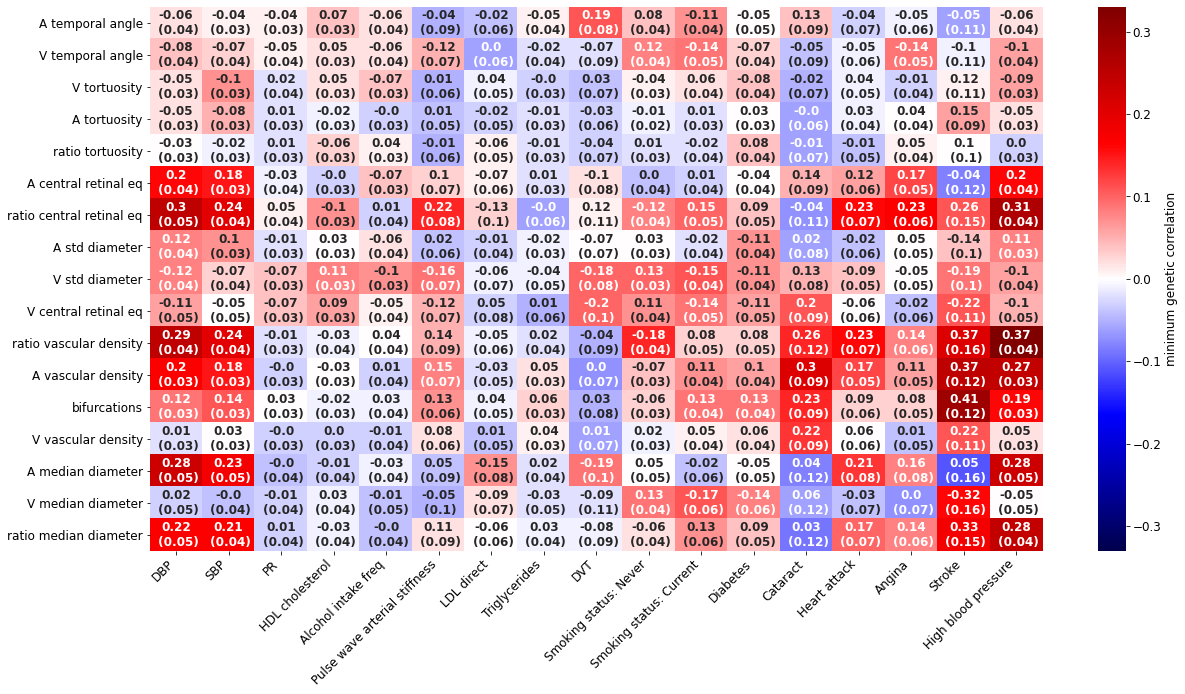

In [53]:
##min gcorr
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12

df_corr_minus_std=abs(df_corr_simpl) - (df_std_simpl)


df = df_corr_simpl.astype(str) + '\n (' + df_std_simpl.astype(str)+ ')'

df_corr_minus_std = df_corr_minus_std.astype(float)

plt.rcParams['font.size'] = '12'
figsize_val_2=(20, 10)
#figsize_val_2=(10, 10)
fig, ax = plt.subplots(figsize=figsize_val_2)
fig1 = sns.heatmap(df_corr_minus_std, 
            annot=df.values, #(log10p>Bonf_thresh).replace({True:'*', False:''}), 
            cbar=True, #If not False
            fmt="", annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_corr_minus_std).max().max(), 
            vmax=abs(df_corr_minus_std).max().max(), 
            cmap='seismic',alpha=1.0, cbar_kws={'label': 'minimum genetic correlation'},
            ax=ax)
plt.xticks(rotation=45, ha='right')

## - SQUARED (all):

#### a) HEAT MAP all:

Text(0.5, 1.0, 'Genetic Correlation')

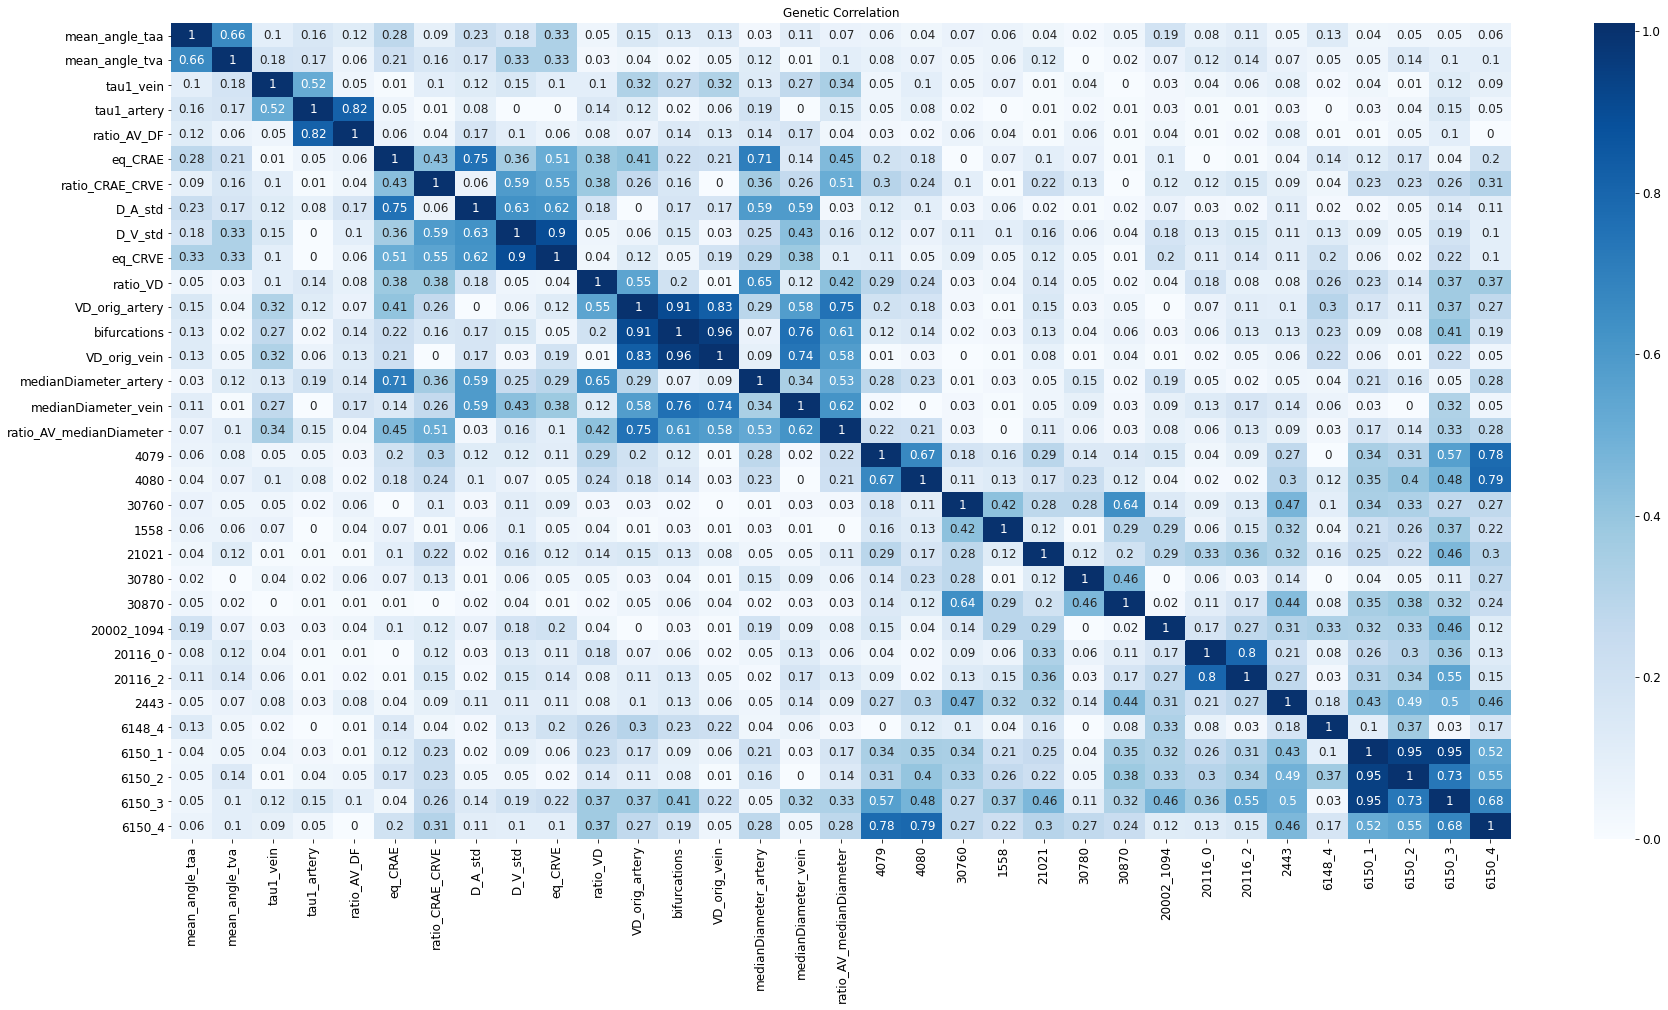

In [ ]:
##### PLOT
df_corr = df_corr.astype(float)
df_corr= df_corr.replace(np.nan, 0)

plt.figure(figsize=(30,15))
#plt.figure(figsize=(10,10))
sb.heatmap(abs(df_corr),cmap="Blues",annot=True)
#sb.heatmap(df2,vmin=0, vmax=1,cmap="Blues",annot=True)
plt.title('Genetic Correlation')
#plt.savefig(save_dir+str(DATE)+'_'+'ventile'+str(ventile_num)+'_heatmap_diseases_gcorr.pdf', bbox_inches='tight', dpi=250)


#### b) pairwise distance metric: an easy proxy for "correlation distance": 1 - abs(corr)
##### clustering method: average

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


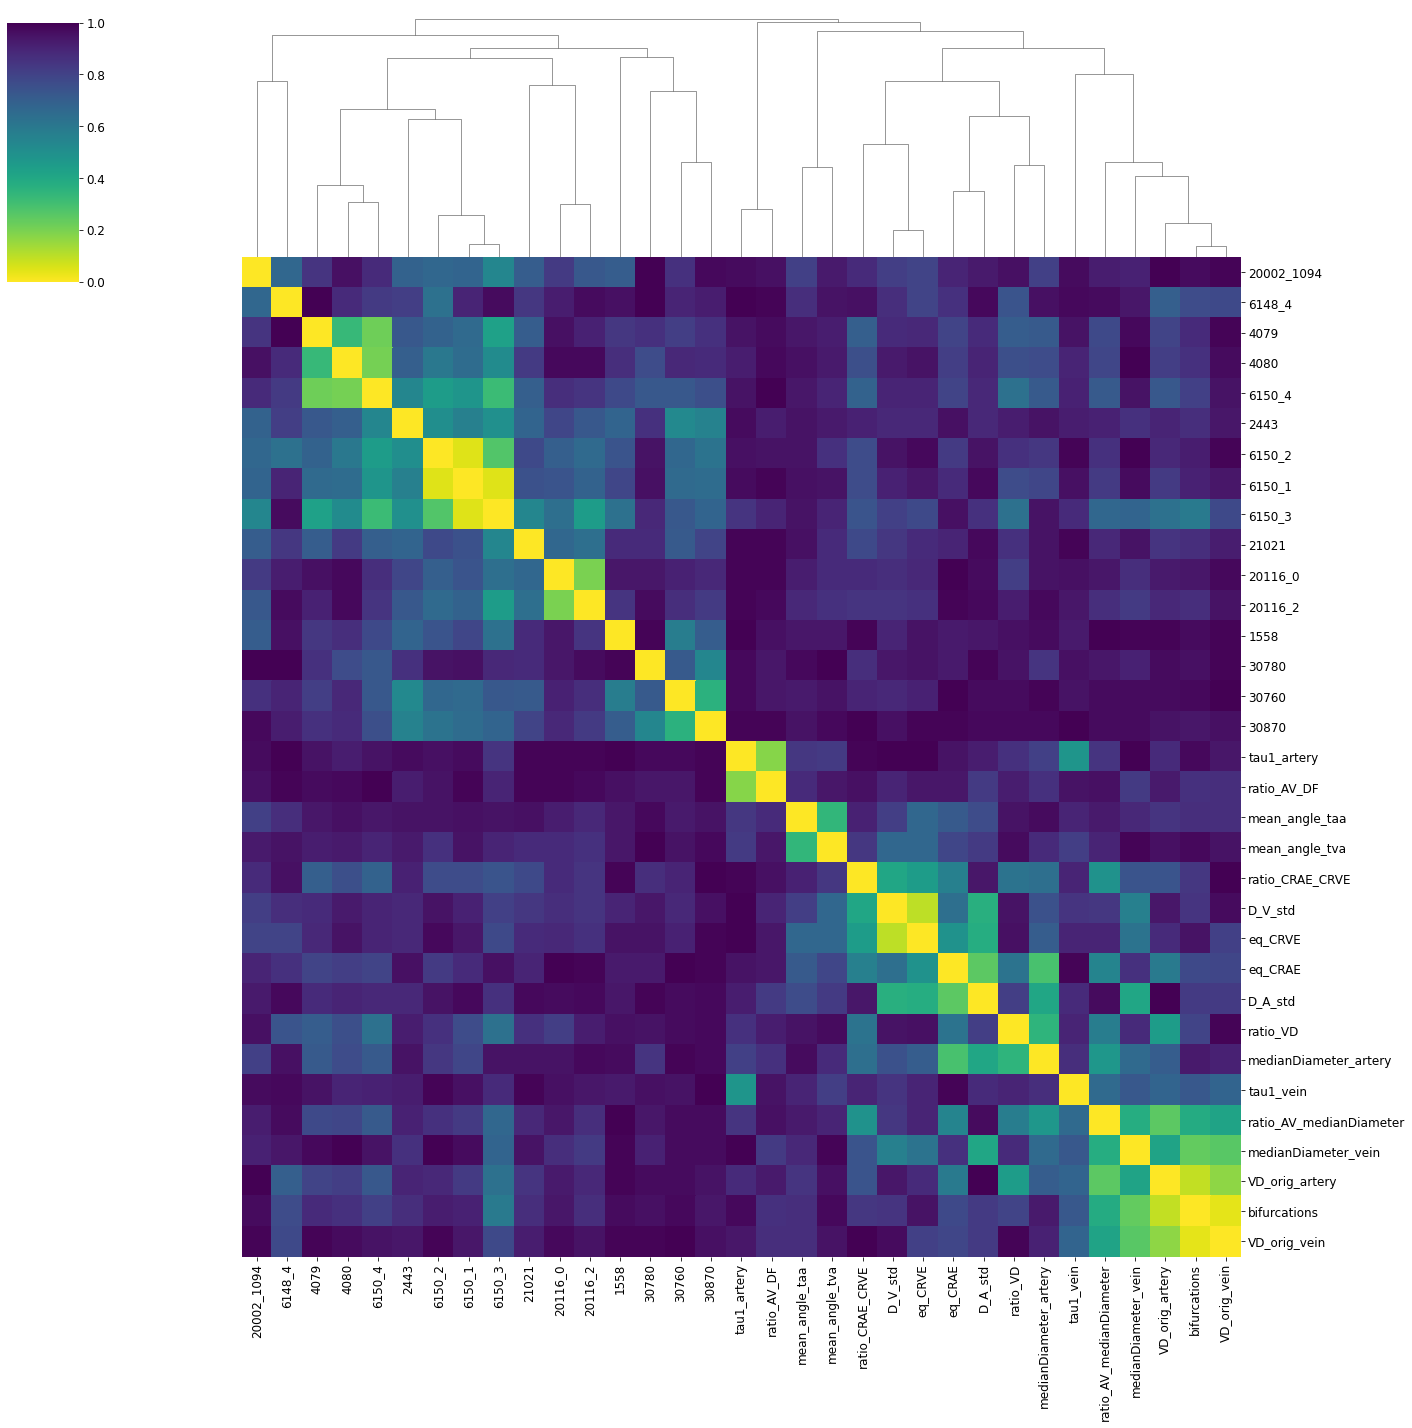

In [ ]:
import seaborn as sns
from matplotlib import cm
from matplotlib import pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
### You need to: 
## - delete the nans, 
## - diagonal to 0, and
## - abs(linkage)

df_2_nan = df_corr
df_2_nan=df_2_nan.replace(np.nan,1)
#print('Count nans: ', df2.isna().sum().sum(), df_2_nan.isna().sum().sum())
# pairwise distance: define distance between two perfectly negatively correlated traits as 0
df_otro = 1 - abs(df_2_nan) 
## diagonal same value:
df_otro.values[[np.arange(df_otro.shape[0])]*2] = 0

linkage = hc.linkage(sp.distance.squareform(df_otro), method='average')
lik_abs= abs(linkage)
h = sns.clustermap(df_otro, row_linkage=lik_abs, col_linkage=lik_abs, cmap=cm.get_cmap('viridis_r'), figsize=(20,20), vmin=0, vmax=1)
h.ax_row_dendrogram.set_visible(False)
#h.ax_heatmap.xaxis.tick_top()
h.ax_heatmap.tick_params(axis='x', rotation=90)
#plt.savefig('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/ldsr_correlation/diseases_12_08_2022_gcorrimagen.jpg')